# from biggles import plot
import numpy

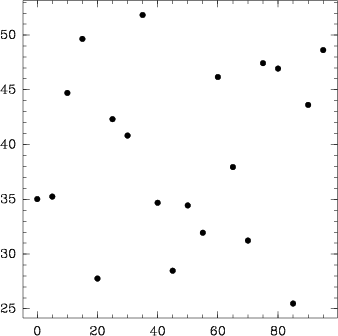

In [17]:
x = numpy.arange(0, 100, 5)
y = numpy.random.normal(40, 10, (len(x),))
p = plot(x, y)
p.dpi=50
p

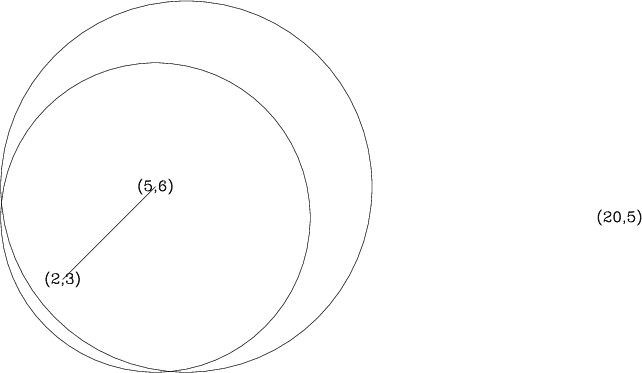

In [15]:
from biggles import *

p = Plot()
p.add(Circle(5,5,5), Circle(6,6,6))
p.add(Line((2,3),(5,6)))
p.add(Label(2,3,"(2,3)"))
p.add(Label(5,6,"(5,6)"))
p.add(Label(20,5,"(20,5)"))
p


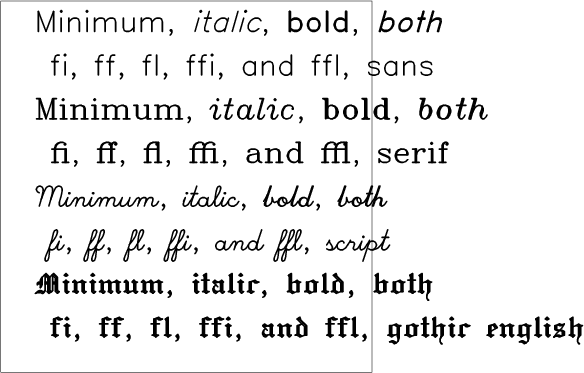

In [47]:
p = Plot()
p.add(Box((0,0),(11,8.5)))
p.add(Label(1,8,r"Minimum, \f2italic\fP, \f3bold\fP, \f4both\fP", size=6, halign='left', face='HersheySans'))
p.add(Label(1,7,r" fi, ff, fl, ffi, and ffl, sans", size=6, halign='left', face='HersheySans'))
p.add(Label(1,6,r"Minimum, \f2italic\fP, \f3bold\fP, \f4both\fP", size=6, halign='left', face='HersheySerif'))
p.add(Label(1,5,r" fi, ff, fl, ffi, and ffl, serif", size=6, halign='left', face='HersheySerif'))
p.add(Label(1,4,r"Minimum, \f2italic\fP, \f3bold\fP, \f4both\fP", size=6, halign='left', face='HersheyScript'))
p.add(Label(1,3,r" fi, ff, fl, ffi, and ffl, script", size=6, halign='left', face='HersheyScript'))
p.add(Label(1,2,r"Minimum, \f2italic\fP, \f3bold\fP, \f4both\fP", size=6, halign='left', face='HersheyGothicEnglish'))
p.add(Label(1,1,r" fi, ff, fl, ffi, and ffl, gothic english", size=6, halign='left', face='HersheyGothicEnglish'))
p

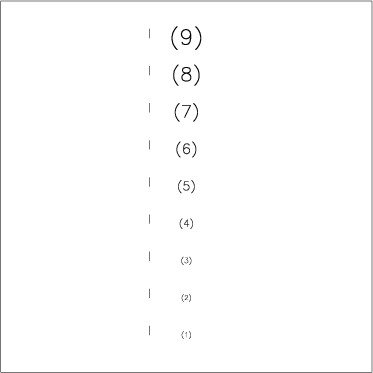

In [57]:
p = Plot()
p.add(Box((0,0),(10,10)))
for y in range(1,10):
        p.add(Label(5,y,"({})".format(y), size=y/2.0, face='HersheySans'))
        p.add(Line((4,y),(4,y+0.25)))
p

In [19]:
import biggles.libplot as libplot
import tempfile

In [17]:
class HpglRenderer(libplot.renderer.LibplotRenderer):

    def __init__(self, width=600, height=800, bgcolor="white"):
        ll = 0, 0
        ur = width, height
        parameters = {
            "BITMAPSIZE": "%dx%d" % (width, height),
            "BG_COLOR":bgcolor,
        }
        super(HpglRenderer, self).__init__(ll, ur, "hpgl", parameters,)
        
    def _repr_png_(self):
        """
        for jupyter notebook inline display
        """
        import subprocess
        import time
        import io

        if hasattr(self,'dpi'):
            dpi=self.dpi
        else:
            dpi=55

        fname = tempfile.mktemp(suffix='_biggles.png')
        self.write(fname,dpi=dpi)

        with open(fname,'rb') as fobj:
            data=fobj.read()
        os.unlink(fname)
        return data


In [20]:
p = HpglRenderer()
p

AttributeError: 'HpglRenderer' object has no attribute 'write'

plPlotter for output to 'hpgl'